# 1 - Perkenalan

Nama: Wenny Chandra Sari

Batch: FTDS - 016

Goal: Memprediksi prilaku dari Pelanggan (retain customers), dengan cara menganalisa data semua Pengguna (churn and no churn customers), dan kemudian mengembangkan Program yang terfokus untuk Mempertahankan Pelanggan Telco.

# 2 - Import Libs

In [1]:
# check version

# import sklearn
# import tensorflow as tf

# print(sklearn.__version__)
# print(tf.__version__)

In [2]:
# adjust the library version
# !pip install --upgrade scikit-learn==1.1.2
# !pip install --upgrade tensorflow-learn==2.11.0

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import pickle

import warnings
warnings.filterwarnings('ignore')

# Untuk membuat model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

# Untuk menyiapkan dataset
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


# Untuk evaluasi model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Untuk saving model
import joblib

In [5]:
# setting syntax

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

np.random.seed(12)
tf.random.set_seed(12)

# 3 - Data Loading

In [6]:
# load dataset
data_o = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# duplikat dataset
data = data_o.copy()

# melihat bagian atas dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [6]:
# melihat bagian bawah dataset

data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# melihat jumlah unik dari data

data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
# melihat ukuran dataset

data.shape

(7043, 21)

In [9]:
# melihat info data set: non-null dan dtype

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data yang akan digunakan terdiri dari 7043 baris dan 21 kolom yang mana 3 kolom numerik dan sisanya object.

Karena TotalCharge adalah jumlah tagihan yang seharusnya bertipe numeric, maka kita akan mengubahnya terlebih dahulu dari tipe objek ke numeric.

In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Insight:

Data yang akan digunakan terdiri dari 7043 baris dan 21 kolom yang mana r kolom numerik dan sisanya object.


# 4 - EDA

In [11]:
# melihat dataset

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


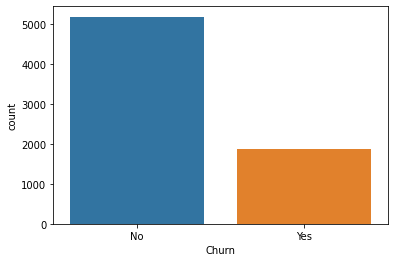

,sum
No,5174
Yes,1869


In [12]:
# melihat persebaran Target: Churn

fig, ax = plt.subplots()
sns.countplot(data=data, x='Churn')
plt.show()

# melihat jumlah dari masing-masing kategori

churn_df = pd.DataFrame(data = data.Churn.value_counts().values, index = data.Churn.value_counts().index, columns=['sum'])
churn_df

Target dataset imbalance dengan Churn Customer 1869 orang dan No Churn Customer 5174 orang namun masih dikisaran 20%.

In [13]:
# memisahkan data categorical dan numerikal dengan unik <= 10

load_cat = []
load_num = []

for col in data.columns:
  if data[col].nunique() <= 10:
    load_cat.append(col)
  else:
    load_num.append(col)

load_cat.remove('Churn')
load_num.remove('customerID')

print('Categorical Data based on Unique Number:', len(load_cat))
print('Numerical Data based on Unique Number:', len(load_num))

Categorical Data based on Unique Number: 16
Numerical Data based on Unique Number: 3


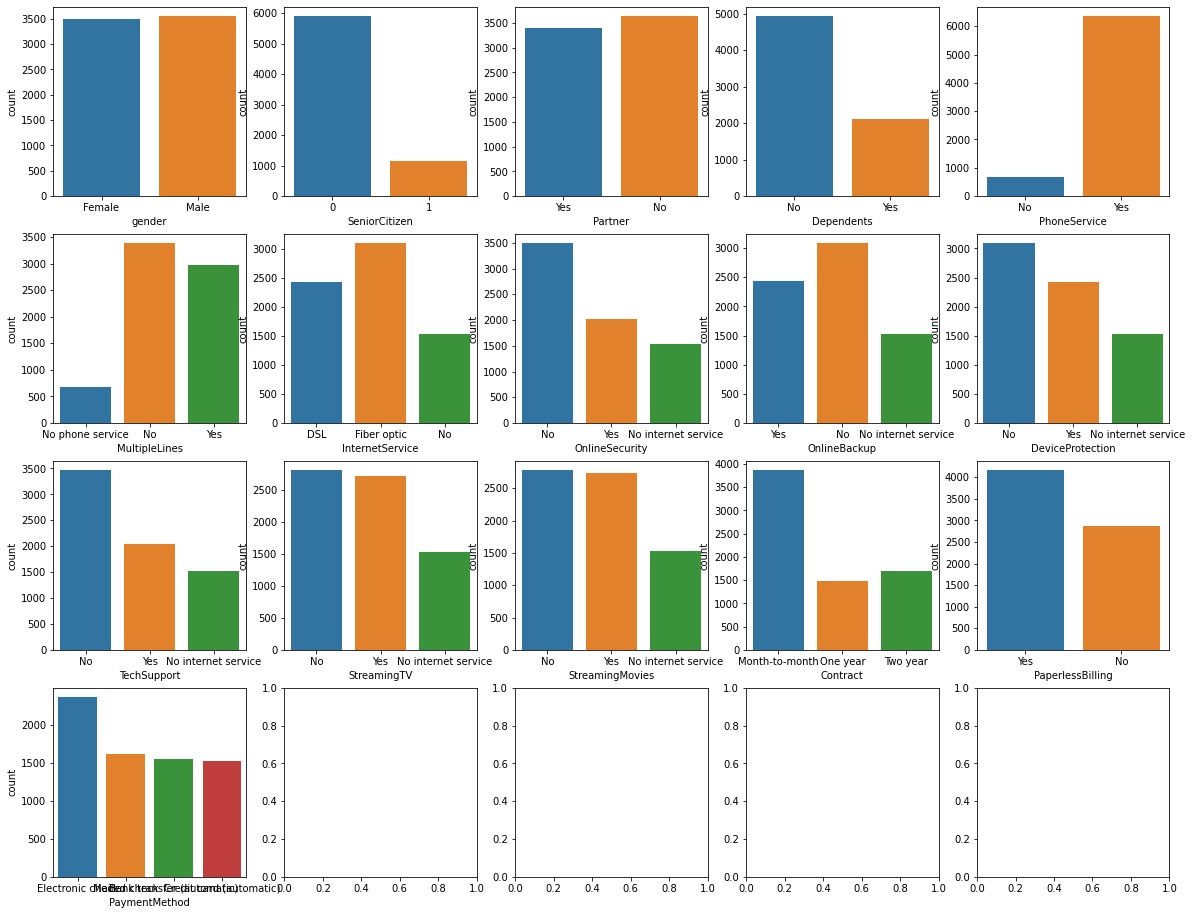

In [14]:
# melihat persebaran pada kolom kategorikal

fig,axes=plt.subplots(nrows=4, ncols=5, figsize=(20,16))
i=0
j=0
for col in load_cat:
    sns.countplot(data=data, x=col, ax=axes[i][j])
    #axes[i][j].legend()
    j+=1
    if j>4:
        i+=1
        j=0
    if i==4:
        break

Melalui eksplorasi Data Scientist melihat terdapat lebih banyak customer dengan karakter productive citizen, has no dependent, has phoneservice, no multiple lines, use fiber optic provider, no online security, no online backup, has no device protection, has no tech support, has no streaming TV, not in contract term, use paperless billing, use electronic check payment. Distribusi gender, partner, has streaming TV, has streaming movies merata, dengan lebih banyak male, no partner, no streaming TV, dan no streaming movie.

Tenure Mean: 32.37, Tenure Median: 29.00, Tenure Min: 0.00, Tenure Max: 72.00, Tenure Modus: 1, Tenure Skew 0.24
Monthly - Charges Mean: 64.76 USD, M-Charges Median: 70.35 USD, M-Charges Min: 18.25 USD, M-Charges Max: 118.75 USD, M-Charges Modus: 20.05 USD, M-Charges Skew -0.22 USD
Total - Charges Mean: 2283.30 USD, T-Charges Median: 1397.47 USD, T-Charges Min: 18.80 USD, T-Charges Max: 8684.80 USD, T-Charges Modus: 20.2 USD, T-Charges Skew 0.96 USD


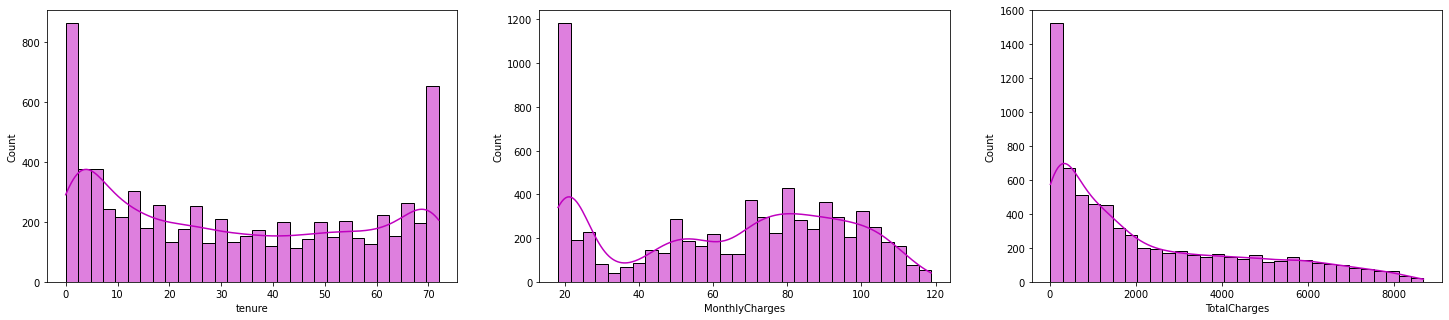

In [15]:
# melihat persebaran pada kolom numerik

fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(25,5))

i=0
j=0

for col in load_num:
    sns.histplot(data=data, x=col, bins= 30, color='m', kde = True, ax=axes[j])
    #axes[i][j].legend()
    j+=1
    if j>2:
        i+=1
        j=0
    if i==1:
        break

print('Tenure Mean: {:.2f}, Tenure Median: {:.2f}, Tenure Min: {:.2f}, Tenure Max: {:.2f}, Tenure Modus: {}, Tenure Skew {:.2f}'.format(data.tenure.mean(), data.tenure.median(), data.tenure.min(), data.tenure.max(), data.tenure.mode()[0], data.tenure.skew()))
print('Monthly - Charges Mean: {:.2f} USD, M-Charges Median: {:.2f} USD, M-Charges Min: {:.2f} USD, M-Charges Max: {:.2f} USD, M-Charges Modus: {} USD, M-Charges Skew {:.2f} USD'.format(data.MonthlyCharges.mean(), data.MonthlyCharges.median(), data.MonthlyCharges.min(), data.MonthlyCharges.max(), data.MonthlyCharges.mode()[0], data.MonthlyCharges.skew()))
print('Total - Charges Mean: {:.2f} USD, T-Charges Median: {:.2f} USD, T-Charges Min: {:.2f} USD, T-Charges Max: {:.2f} USD, T-Charges Modus: {} USD, T-Charges Skew {:.2f} USD'.format(data.TotalCharges.mean(), data.TotalCharges.median(), data.TotalCharges.min(), data.TotalCharges.max(), data.TotalCharges.mode()[0], data.TotalCharges.skew()))

Melalui eksplorasi Data Scientist melihat persebaran kolom Tenure tertinggi di 1 bulan, dengan rata-rata 32 bulan. Persebaran kolom MonthlyCharges tertinggi di 20.05 USD, dengan rata-rata 64.76 USD. Persebaran kolom TotalCharges tertinggi di 20.02 USD, dengan median 1397.47 USD.

In [16]:
# melihat hubungan kolom categorical dan Churn

dependent = []
independent = []

for col in load_cat:
  contingency_table=pd.crosstab(data[col],data['Churn'])
  
  stat, p, dof, expected = stats.chi2_contingency(contingency_table)
  print('p=%.3f' % (p))
  if p > 0.05:
    print(f'Probably {col} is independent')
    independent.append(col)
  else:
    print(f'Probably {col} is dependent')
    dependent.append(col)
  print('')

print('Number Dependent Columns: ', len(dependent))
print('Dependent Columns: ', dependent)
print('')
print('Number Independent Columns: ', len(independent))
print('Independent Columns: ', independent)

p=0.487
Probably gender is independent

p=0.000
Probably SeniorCitizen is dependent

p=0.000
Probably Partner is dependent

p=0.000
Probably Dependents is dependent

p=0.339
Probably PhoneService is independent

p=0.003
Probably MultipleLines is dependent

p=0.000
Probably InternetService is dependent

p=0.000
Probably OnlineSecurity is dependent

p=0.000
Probably OnlineBackup is dependent

p=0.000
Probably DeviceProtection is dependent

p=0.000
Probably TechSupport is dependent

p=0.000
Probably StreamingTV is dependent

p=0.000
Probably StreamingMovies is dependent

p=0.000
Probably Contract is dependent

p=0.000
Probably PaperlessBilling is dependent

p=0.000
Probably PaymentMethod is dependent

Number Dependent Columns:  14
Dependent Columns:  ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Number Ind

Berdasarkan chisquare Data Scientist meliha kolom Churn memiliki hubungan dengan kolom 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'. Dan kurang memiliki hubungan dengan kolom 'gender', 'PhoneService'.

In [17]:
# melihat hubungan antara kolom numerikal dan 'Churn'

X = pd.get_dummies(data[['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges']]).corr()
X.style.background_gradient(cmap='coolwarm')

,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
tenure,1.000000,0.247900,0.825880,0.352229,-0.352229
MonthlyCharges,0.247900,1.000000,0.651065,-0.193356,0.193356
TotalCharges,0.825880,0.651065,1.000000,0.199484,-0.199484
Churn_No,0.352229,-0.193356,0.199484,1.000000,-1.000000
Churn_Yes,-0.352229,0.193356,-0.199484,-1.000000,1.000000


Berdasarkan get_dummies Data Scientist melihat kolom Churn memiliki hubungan dengan kolom 'tenure', 'MonthlyCharges', 'TotalCharges'.

Kumpulan insight:

- Target dataset imbalance dengan Churn Customer 1869 orang dan No Churn Customer 5174 orang. Perbedaan target dapat mempengaruhi ketepatan prediksi model.
- Melalui eksplorasi Data Scientist melihat terdapat lebih banyak customer dengan karakter productive citizen, has no dependent, has phoneservice, no multiple lines, use fiber optic provider, no online security, no online backup, has no device protection, has no tech support, has no streaming TV, not in contract term, use paperless billing, use electronic check payment. Distribusi gender, partner, has streaming TV, has streaming movies merata, dengan lebih banyak male, no partner, no streaming TV, dan no streaming movie.
- Melalui eksplorasi Data Scientist melihat persebaran kolom Tenure tertinggi di 1 bulan, dengan rata-rata 32 bulan. Persebaran kolom MonthlyCharges tertinggi di 20.05 USD, dengan rata-rata 64.76 USD. Persebaran kolom TotalCharges tertinggi di 20.02 USD, dengan median 1397.47 USD.
- Berdasarkan chisquare Data Scientist meliha kolom Churn memiliki hubungan dengan kolom 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'. Dan kurang memiliki hubungan dengan kolom 'gender', 'PhoneService' dengan nilai p-value < 0.05.
- Berdasarkan get_dummies Data Scientist melihat kolom Churn memiliki hubungan dengan kolom 'tenure', 'MonthlyCharges', 'TotalCharges' dengan correlation tertinggi 35% dan terendah 19 %.

# 5 - Data Preprocessing

## 5.1 -- Get the Data for Model Inference

In [18]:
# Membuat data inference

data_inf = data.sample(10, random_state=50)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5585,4667-OHGKG,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.30,19.30,Yes
3317,6685-GBWJZ,Male,0,Yes,No,63,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Credit card (automatic),70.80,4448.80,No
6875,6848-HJTXY,Female,0,Yes,No,64,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.45,1208.60,No
6074,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
1758,5848-FHRFC,Female,0,No,No,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.05,1386.90,No
3239,3890-RTCMS,Male,0,No,No,16,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.45,799.00,No
644,8404-VLQFB,Female,0,Yes,Yes,15,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.25,394.85,No
3844,3594-UVONA,Female,0,No,No,35,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),85.95,3110.10,Yes
5924,2236-HILPA,Male,0,Yes,Yes,62,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.65,1218.45,No
3107,5038-ETMLM,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.65,8182.75,No


In [19]:
# Menghapus inference set dari dataset awal

data_train_val_test = data.drop(data_inf.index)
data_train_val_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
# Reset index pada data Inference dan data awal agar tidak terjadi error

data_inf.reset_index(drop=True, inplace=True)
data_train_val_test.reset_index(drop=True, inplace=True)

data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4667-OHGKG,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.30,19.30,Yes
1,6685-GBWJZ,Male,0,Yes,No,63,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Credit card (automatic),70.80,4448.80,No
2,6848-HJTXY,Female,0,Yes,No,64,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.45,1208.60,No
3,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
4,5848-FHRFC,Female,0,No,No,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.05,1386.90,No
5,3890-RTCMS,Male,0,No,No,16,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,49.45,799.00,No
6,8404-VLQFB,Female,0,Yes,Yes,15,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.25,394.85,No
7,3594-UVONA,Female,0,No,No,35,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),85.95,3110.10,Yes
8,2236-HILPA,Male,0,Yes,Yes,62,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.65,1218.45,No
9,5038-ETMLM,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.65,8182.75,No


## 5.2 -- Splitting Between Train-Set, Val-Set and Test-Set

Kita akan memisahkan data menjadi Train-Set, Validation Set, dan juga Test-Set.

In [21]:
# Memisahkan `X` (Features) and `y` (Targets)

X = data_train_val_test.drop('Churn', axis=1)
y = data_train_val_test['Churn']

In [22]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=12, stratify=data_train_val_test.Churn)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=12)

print("Train Size : ", X_train.shape)
print("Val Size : ", X_val.shape)
print("Test Size : ", X_test.shape)

Train Size :  (5379, 20)
Val Size :  (950, 20)
Test Size :  (704, 20)


## 5.3 -- Handling Missing Values

Kita akan melakukan check Missing Values pada Train Set dan Test Set.

### 1 -- Train_set

In [23]:
# Mengecek jumlah missing value tiap kolom pada Train-Set

X_train.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
dtype: int64

In [24]:
y_train.isnull().sum()

0

Ternyata ada missing values pada kolom TotalCharges, dan karena kolom tersebut bertipe numeric dan tipe persebaran datanya skew, maka akan kita input missing values dengan nilai median.

In [25]:
X_train['TotalCharges'].fillna(int(data['TotalCharges'].median()), inplace=True)
X_train['TotalCharges'].isnull().sum()

0

### 2 -- Val_set

In [26]:
# Mengecek jumlah missing value tiap kolom pada Test-Set

X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [27]:
# Mengecek jumlah missing value tiap kolom pada Test-Set

y_val.isnull().sum()

0

Ternyata terdapat missing values di kolom yang sama pada Validation Set, akan kita isi juga dengan median karena datanya bertipe skewed.

In [28]:
X_val['TotalCharges'].fillna(int(data['TotalCharges'].median()), inplace=True)
X_val['TotalCharges'].isnull().sum()

0

### 3 -- Test_set

In [29]:
# Mengecek jumlah missing value tiap kolom pada Test-Set

X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [30]:
y_test.isnull().sum()

0

Ada missing values juga pada kolom TotalCharges dimana akan kita inputasi menggunakan nilai median.

In [31]:
X_test['TotalCharges'].fillna(int(data['TotalCharges'].median()), inplace=True)
X_test['TotalCharges'].isnull().sum()

0

## 5.4 -- Handling Outliers

### 1 -- Check Distribution

Sebelum menentukan metode handling outliers, kita harus mengetahui tipe distribusi dari data kita.

In [32]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title(f'{variable} Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title(f'{variable} Boxplot')

    plt.show()

    print(variable, 'skewness value : ', df[variable].skew())

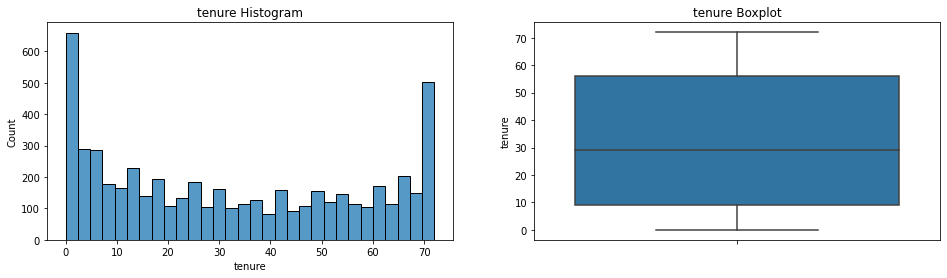

tenure skewness value :  0.2311142699308985


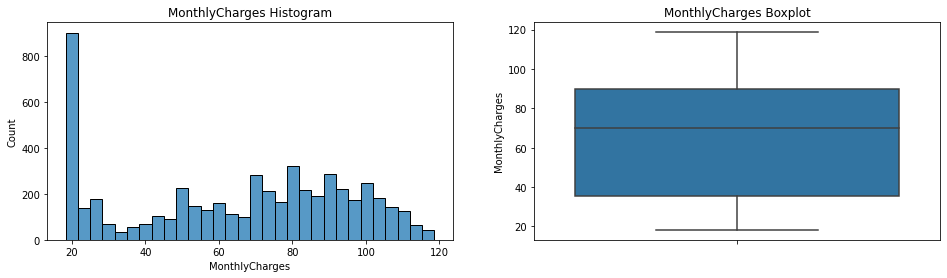

MonthlyCharges skewness value :  -0.21893543144863678


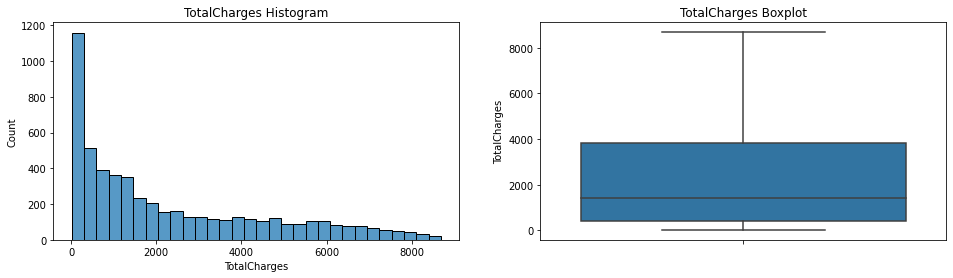

TotalCharges skewness value :  0.9621959560117905


In [33]:
diagnostic_plots(X_train, 'tenure')
diagnostic_plots(X_train, 'MonthlyCharges')
diagnostic_plots(X_train, 'TotalCharges')

Ternyata kolom numeric kita tidak memiliki outliers di dalamnya sehingga kita bisa melanjutkan ke tahap selanjutnya.

### 2 -- Handling Outliers

## 5.5 -- Features Selection

Untuk permulaan saya akan coba untuk menggunakan semua feature kecuali customerID.

In [34]:
# drop columns

X_train.drop(columns=['customerID'], axis=1, inplace=True)
X_val.drop(columns=['customerID'], axis=1, inplace=True)
X_test.drop(columns=['customerID'], axis=1, inplace=True)
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2819,Male,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,74.40
289,Male,0,No,No,10,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),44.85,435.40
2361,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.75,44.75
5632,Male,0,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,109.30
7006,Female,0,No,No,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,49.95,49.95


## 5.6 -- Split between Numerical Columns and Categorical Columns

In [35]:
# Mendapatkan list Numerical columns dan Categorical columns

num_cols_norm = ['tenure', 'MonthlyCharges']
num_cols_skew = ['TotalCharges']
cat_pass = ['SeniorCitizen']
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

print('Numerical Columns Normal : ', num_cols_norm)
print('Numerical Columns Skewed : ', num_cols_skew)
print('Categorical Columns : ', cat_cols)
print('Categorical Columns Encoded : ', cat_pass)

Numerical Columns Normal :  ['tenure', 'MonthlyCharges']
Numerical Columns Skewed :  ['TotalCharges']
Categorical Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Categorical Columns Encoded :  ['SeniorCitizen']


## 5.7 -- Features Engineering

Kita akan melakukan scaling dan encoding menggunakan pipeline.

Karena data kita di atas ada yang bertipe skewed dan ada yang normal, maka akan dilakukan scaling menggunakan MinMaxScaler untuk yang skewed dan StandardScaler untuk yang normal. Untuk kolom categorical akan digunakan OneHotEncoder.

In [36]:
# # Numeric and Categorical Features Engineering Pipeline
# skew_pipe = Pipeline([(SimpleImputer(strategy='median'), MinMaxScaler())])
# norm_pipe = Pipeline([(SimpleImputer(strategy='mean'), StandardScaler())])
# cat_pipe = Pipeline([(OneHotEncoder())])

# # Preprocessing Pipeline
# preprocess_pipe = ColumnTransformer([
#     ('norm', norm_pipe, num_cols_norm),
#     ('skew', skew_pipe, num_cols_skew),
#     ('cat', cat_pipe, cat_cols),
#     ('pass', 'passthrough', cat_pass)
# ])

In [37]:
# # fit and transform

# X_train = preprocess_pipe.fit_transform(X_train)
# X_val = preprocess_pipe.transform(X_val)
# X_test = preprocess_pipe.transform(X_test)
# X_train.shape

In [38]:
# Numeric and Categorical Features Engineering Pipeline
skew_pipe = Pipeline([('skew_scale', MinMaxScaler())])
norm_pipe = Pipeline([('norm_scale', StandardScaler())])
cat_pipe = Pipeline([('encode', OneHotEncoder())])

# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('norm', norm_pipe, num_cols_norm),
    ('skew', skew_pipe, num_cols_skew),
    ('cat', cat_pipe, cat_cols),
    ('pass', 'passthrough', cat_pass)
])

In [39]:
# fit and transform

X_train = preprocess.fit_transform(X_train)
X_val = preprocess.transform(X_val)
X_test = preprocess.transform(X_test)
X_train.shape

(5379, 45)

In [40]:
# Save Pipeline

# with open('preprocess.pkl', 'wb') as file_1:
#   joblib.dump(preprocess, file_1)

## 5.8 -- Encoding Target

In [41]:
# Encode the target

label_enc = LabelEncoder()

y_train_encoded = label_enc.fit_transform(y_train)
y_val_encoded = label_enc.transform(y_val)
y_test_encoded = label_enc.transform(y_test)

In [42]:
# Convert to dataframe

y_train_final = pd.DataFrame(y_train_encoded, columns=['Churn'])
y_val_final = pd.DataFrame(y_val_encoded, columns=['Churn'])
y_test_final = pd.DataFrame(y_test_encoded, columns=['Churn'])

y_train_final.shape

(5379, 1)

In [43]:
# Save label_enc

# with open('label_enc.pkl', 'wb') as file_2:
#   joblib.dump(label_enc, file_2)

## 5.9 -- Tensor Pipeline

In [44]:
# Create training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_final))
train_dataset = train_dataset.shuffle(100).batch(64).repeat(2).prefetch(tf.data.AUTOTUNE)

# Create val dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_final))
val_dataset = val_dataset.batch(64)

# Create test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_final))
test_dataset = test_dataset.batch(64)

In [45]:
for row in train_dataset.take(1):
  print(row)

(<tf.Tensor: shape=(64, 45), dtype=float64, numpy=
array([[-0.30418305, -0.30617597,  0.15999308, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18354349, -1.48341126,  0.08850104, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5886902 ,  0.83946683,  0.17407685, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.9544851 , -1.32378613,  0.01978421, ...,  1.        ,
         0.        ,  0.        ],
       [-0.83255347, -1.51001544,  0.02314216, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42611468,  0.99576643,  0.2187976 , ...,  0.        ,
         0.        ,  0.        ]])>, <tf.Tensor: shape=(64, 1), dtype=int32, numpy=
array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],

Karena kita sudah mendefinisikan batch 64 di Tensor Pipeline maka kita tidak akan mendefinisikan batch size di model training.

# 6 - Sequential API

## 6.1 - Baseline Model

In [46]:
X_train.shape

(5379, 45)

In [47]:
# Create Sequential_Model_Baseline

model_seq_bs = Sequential()
model_seq_bs.add(Dense(4, input_shape=(45,))) # Hidden layer 1
model_seq_bs.add(Dense(1)) # Output layer

model_seq_bs.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

model_seq_bs.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 184       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


**Baseline Sequential Model merupakan Multilayer Perceptron untuk binary classification yaitu model yang memiliki minimal 1 hidden layer dan menghasilkan 1 output.**

**Model terdiri dari 3 layer yaitu:**
1. Layer input: menerima 45 neuron input sesuai dengan jumlah feature yang diinput setelah scaling, encoding, dan tensor_pipeline.
2. Hidden layer: terdiri dari 4 neuron sebagai tebakan awal.
3. Output layer: menghasilkan 1 neuron digunakan untuk dataset binary classification.

**Parameter pada compile adalah:**
1. Loss function: binary_crossentropy. Model menggunakan loss function binary_cronssentropy karena dataset binary classification
2. Metric: accuracy. Model menggunakan metric accuracy.

In [48]:
# Train Sequential Model
history_seq_bs = model_seq_bs.fit(train_dataset, validation_data=(val_dataset), epochs=10, verbose=1)

Epoch 1/10
170/170 [==============================] - 2s 4ms/step - loss: 1.0999 - accuracy: 0.7312 - val_loss: 0.6733 - val_accuracy: 0.7611
Epoch 2/10
170/170 [==============================] - 1s 3ms/step - loss: 0.5874 - accuracy: 0.7735 - val_loss: 0.5367 - val_accuracy: 0.7874
Epoch 3/10
170/170 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7889 - val_loss: 0.5230 - val_accuracy: 0.7884
Epoch 4/10
170/170 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.7973 - val_loss: 0.5329 - val_accuracy: 0.7947
Epoch 5/10
170/170 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.8020 - val_loss: 0.5304 - val_accuracy: 0.7916
Epoch 6/10
170/170 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.8042 - val_loss: 0.5283 - val_accuracy: 0.7979
Epoch 7/10
170/170 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.8015 - val_loss: 0.5429 - val_accuracy: 0.7989
Epoch 

**Baseline Sequential Model di train menggunakan batch 64 (lihat tensor pipeline) dan epoch 10.**

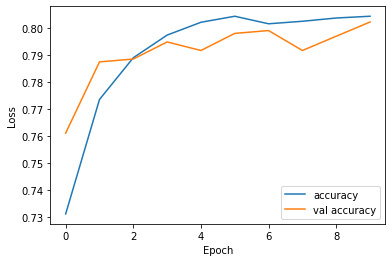

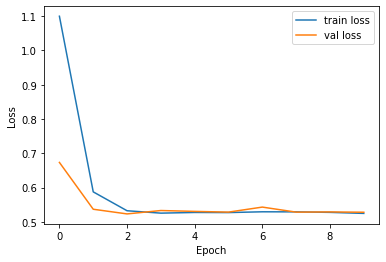

In [49]:
# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_seq_bs.history['accuracy'],label='accuracy')
ax.plot(range(10),history_seq_bs.history['val_accuracy'],label='val accuracy')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_seq_bs.history['loss'],label='train loss')
ax.plot(range(10),history_seq_bs.history['val_loss'],label='val loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [50]:
# Model evaluation using clasification report

y_pred_seq = model_seq_bs.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       517
           1       0.61      0.49      0.54       187

    accuracy                           0.78       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.77      0.78      0.77       704



**Berdasarkan visualisasi terlihat accuracy dan loss dari train_dataset dan val_dataset sudah cukup baik.** Accuracy mengalami kenaikan dengan gap yang kecil antar train_dataset dan val_dataset. Accuracy val_dataset menyentuh angka 0.7905 di akhir epoch. Loss mengalami penurunan dengan gap yang kecil antar train_dataset dan val_dataset. Loss val_dataset menyentuh angka 0.5773 di akhir epoch.

**Churn merupakan suatu kejadian dimana seorang customer memutus hubungan dengan perusahaan kita.** Tujuan kita adalah untuk meminimalisir churn rate sehingga kita akan berfokus pada label 0 yaitu orang yang tidak churn. Dengan berfokus ke label 0 kita bisa lebih menargetkan promo atau fitur atau service baru kepada customer yang tersebut agar bertahan sambil mencari customer baru.

**Berdasarkan classification record, model memiliki precision 0.84 dan recall sebesar 0.89 yang tergolong tinggi.**

- Precision : Jadi dari 517 customer yang tidak churn, kita berhasil mengklasifikasikan 84% customer benar tidak churn dan dan salah mengklasifikasikan 16% sisanya sebagai customer yang churn padahal seharusnya tidak churn.
- Recall : Jadi dari 517 customer yang tidak churn, kita berhasil mengklasifikasikan 88% customer benar tidak churn dan salah mengklasifikasikan 12% yang seharusnya dia churn tapi kita anggap sebagai tidak churn.

**Kita akan melakukan tunning untuk meningkatkan accuracy dan menurunkan loss.**


## 6.2 - Seq Model (after Tunning)

### a. Define Neuron, Layer, and Activation Function

In [51]:
# 2 hidden layer 4, 2

model_seq_1 = Sequential()
model_seq_1.add(Dense(4, input_shape=(45,))) # Hidden layer 1
model_seq_1.add(Dense(2)) # Hidden layer 2
model_seq_1.add(Dense(1)) # Output layer

model_seq_1.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

model_seq_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 184       
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [52]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid

model_seq_1 = Sequential()
model_seq_1.add(Dense(4, input_shape=(45,), activation='relu')) # Hidden layer 1
model_seq_1.add(Dense(2)) # Hidden layer 2
model_seq_1.add(Dense(1, activation ='sigmoid')) # Output layer

model_seq_1.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

model_seq_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 184       
                                                                 
 dense_6 (Dense)             (None, 2)                 10        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Train Sequential Model
history_seq_1 = model_seq_1.fit(train_dataset, validation_data=(val_dataset), epochs=10, verbose=1)

Epoch 1/10
170/170 [==============================] - 2s 4ms/step - loss: 0.5624 - accuracy: 0.6978 - val_loss: 0.4731 - val_accuracy: 0.7758
Epoch 2/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.7916 - val_loss: 0.4436 - val_accuracy: 0.7916
Epoch 3/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4223 - accuracy: 0.8039 - val_loss: 0.4390 - val_accuracy: 0.7947
Epoch 4/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8083 - val_loss: 0.4363 - val_accuracy: 0.8000
Epoch 5/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8098 - val_loss: 0.4354 - val_accuracy: 0.8011
Epoch 6/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.8107 - val_loss: 0.4334 - val_accuracy: 0.8000
Epoch 7/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8113 - val_loss: 0.4320 - val_accuracy: 0.7968
Epoch 

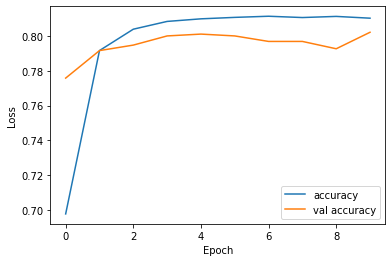

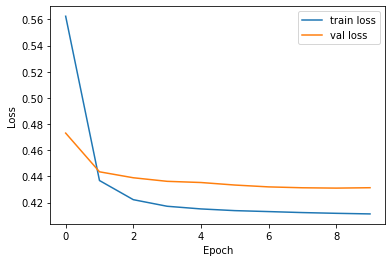

In [54]:
# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_seq_1.history['accuracy'],label='accuracy')
ax.plot(range(10),history_seq_1.history['val_accuracy'],label='val accuracy')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_seq_1.history['loss'],label='train loss')
ax.plot(range(10),history_seq_1.history['val_loss'],label='val loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [55]:
# Baseline Sequential evaluation using clasification report

y_pred_seq = model_seq_bs.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq))

# Tuned Sequential Model evaluation using clasification report

y_pred_seq_1 = model_seq_1.predict(X_test)
y_pred_seq_1 = np.where(y_pred_seq_1 >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq_1))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       517
           1       0.61      0.49      0.54       187

    accuracy                           0.78       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.77      0.78      0.77       704

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       517
           1       0.62      0.49      0.54       187

    accuracy                           0.78       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.77      0.78      0.78       704



**Setelah melakukan beberapa percobaan saya menggunakan 2 hidden layer dengan neuron (4,2), fungsi aktivasi relu pada hidden layer 1 dan fungsi aktivasi sigmoid pada layer output, loss function binary_crossentropy, metrik accuracy, dan epoch 10.**

Visualisasi accuracy antara train_dataset dan val_dataset sama-sama mengalami peningkatan, garis terlihat lebih halus, dan gap kecil.

Visualisasi error antara train_dataset dan val_dataset sama-sama mengalami penurunan, garis terlihat lebih halus, dan gap kecil.

Evaluation report akan kita lihat di akhir Tunning.

### b. Weight Initialization

['RandomNormal','GlorotUniform','GlorotNormal','RandomUniform','Zeros']

In [56]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid, weight initialization Zeros
model_seq_2 = Sequential()
model_seq_2.add(Dense(4, input_shape=(45,), activation='relu', kernel_initializer=tf.keras.initializers.Zeros())) # Hidden layer 1
model_seq_2.add(Dense(2)) # Hidden layer 2
model_seq_2.add(Dense(1, activation ='sigmoid')) # Output layer

model_seq_2.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

model_seq_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 184       
                                                                 
 dense_9 (Dense)             (None, 2)                 10        
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [57]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid, weight initialization RandomUniform
model_seq_2 = Sequential()
model_seq_2.add(Dense(4, input_shape=(45,), activation='relu', kernel_initializer=tf.keras.initializers.RandomUniform(seed=12))) # Hidden layer 1
model_seq_2.add(Dense(2)) # Hidden layer 2
model_seq_2.add(Dense(1, activation ='sigmoid')) # Output layer

model_seq_2.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

model_seq_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4)                 184       
                                                                 
 dense_12 (Dense)            (None, 2)                 10        
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [58]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid, weight initialization RandomNormal
model_seq_2 = Sequential()
model_seq_2.add(Dense(4, input_shape=(45,), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(seed=12))) # Hidden layer 1
model_seq_2.add(Dense(2)) # Hidden layer 2
model_seq_2.add(Dense(1, activation ='sigmoid')) # Output layer

model_seq_2.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

model_seq_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 184       
                                                                 
 dense_15 (Dense)            (None, 2)                 10        
                                                                 
 dense_16 (Dense)            (None, 1)                 3         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [59]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid, weight initialization GlorotUniform

model_seq_2 = Sequential()
model_seq_2.add(Dense(4, input_shape=(45,), activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=12))) # Hidden layer 1
model_seq_2.add(Dense(2)) # Hidden layer 2
model_seq_2.add(Dense(1, activation ='sigmoid')) # Output layer

model_seq_2.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

model_seq_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 4)                 184       
                                                                 
 dense_18 (Dense)            (None, 2)                 10        
                                                                 
 dense_19 (Dense)            (None, 1)                 3         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [60]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid, weight initialization GlorotNormal

model_seq_2 = Sequential()
model_seq_2.add(Dense(4, input_shape=(45,), activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=12))) # Hidden layer 1
model_seq_2.add(Dense(2)) # Hidden layer 2
model_seq_2.add(Dense(1, activation ='sigmoid')) # Output layer

model_seq_2.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

model_seq_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 184       
                                                                 
 dense_21 (Dense)            (None, 2)                 10        
                                                                 
 dense_22 (Dense)            (None, 1)                 3         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Train Sequential Model
history_seq_2 = model_seq_2.fit(train_dataset, validation_data=(val_dataset), epochs=10, verbose=1)

Epoch 1/10
170/170 [==============================] - 2s 5ms/step - loss: 0.4600 - accuracy: 0.7834 - val_loss: 0.4464 - val_accuracy: 0.7958
Epoch 2/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4255 - accuracy: 0.8023 - val_loss: 0.4357 - val_accuracy: 0.7958
Epoch 3/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4183 - accuracy: 0.8045 - val_loss: 0.4316 - val_accuracy: 0.7979
Epoch 4/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4154 - accuracy: 0.8061 - val_loss: 0.4295 - val_accuracy: 0.8000
Epoch 5/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4137 - accuracy: 0.8056 - val_loss: 0.4286 - val_accuracy: 0.8000
Epoch 6/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4130 - accuracy: 0.8057 - val_loss: 0.4280 - val_accuracy: 0.7979
Epoch 7/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.8052 - val_loss: 0.4262 - val_accuracy: 0.8011
Epoch 

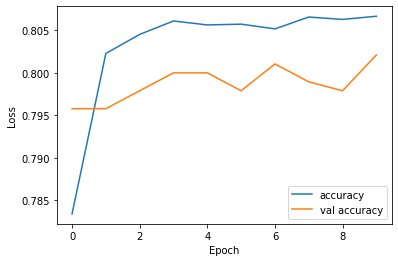

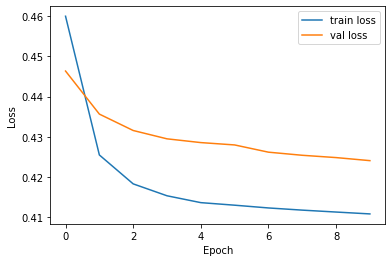

In [62]:
# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_seq_2.history['accuracy'],label='accuracy')
ax.plot(range(10),history_seq_2.history['val_accuracy'],label='val accuracy')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_seq_2.history['loss'],label='train loss')
ax.plot(range(10),history_seq_2.history['val_loss'],label='val loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [63]:
# Baseline Sequential evaluation using clasification report

y_pred_seq_bs = model_seq_bs.predict(X_test)
y_pred_seq_bs = np.where(y_pred_seq_bs >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq))

# Tuned Sequential Model evaluation using clasification report

y_pred_seq_2 = model_seq_2.predict(X_test)
y_pred_seq_2 = np.where(y_pred_seq_2 >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq_2))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       517
           1       0.61      0.49      0.54       187

    accuracy                           0.78       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.77      0.78      0.77       704

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       517
           1       0.62      0.51      0.56       187

    accuracy                           0.79       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.78      0.79      0.78       704



**Setelah melakukan beberapa percobaan saya menambahkan weight initialization GlorotNormal.**

Visualisasi accuracy antara train_dataset dan val_dataset sama-sama mengalami peningkatan, garis terlihat lebih halus, dan gap kecil.

Visualisasi error antara train_dataset dan val_dataset sama-sama mengalami penurunan, garis terlihat lebih halus, dan gap kecil.

Evaluation report akan kita lihat di akhir Tunning.

### c. BatchNormalization

In [64]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid, weight initialization GlorotNormal, with BatchNormalization

model_seq_3 = Sequential()

model_seq_3.add(Dense(4, input_shape=(45,), kernel_initializer=tf.keras.initializers.GlorotNormal(seed=12))) # Hidden layer 1
model_seq_3.add(tf.keras.layers.BatchNormalization())
model_seq_3.add(tf.keras.layers.Activation('relu'))

model_seq_3.add(Dense(2)) # Hidden layer 2
model_seq_3.add(tf.keras.layers.BatchNormalization())

model_seq_3.add(Dense(1)) # Output layer
model_seq_3.add(tf.keras.layers.BatchNormalization())
model_seq_3.add(tf.keras.layers.Activation('sigmoid'))

model_seq_3.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

model_seq_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 4)                 184       
                                                                 
 batch_normalization (BatchN  (None, 4)                16        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
 dense_24 (Dense)            (None, 2)                 10        
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_25 (Dense)            (None, 1)                

In [65]:
# Train Sequential Model
history_seq_3 = model_seq_3.fit(train_dataset, validation_data=(val_dataset), epochs=10, verbose=1)

Epoch 1/10
170/170 [==============================] - 4s 5ms/step - loss: 0.5954 - accuracy: 0.6990 - val_loss: 0.5630 - val_accuracy: 0.7400
Epoch 2/10
170/170 [==============================] - 1s 4ms/step - loss: 0.5267 - accuracy: 0.7679 - val_loss: 0.5199 - val_accuracy: 0.7653
Epoch 3/10
170/170 [==============================] - 1s 4ms/step - loss: 0.4947 - accuracy: 0.7846 - val_loss: 0.4868 - val_accuracy: 0.7758
Epoch 4/10
170/170 [==============================] - 1s 4ms/step - loss: 0.4718 - accuracy: 0.7918 - val_loss: 0.4654 - val_accuracy: 0.7821
Epoch 5/10
170/170 [==============================] - 1s 4ms/step - loss: 0.4542 - accuracy: 0.7964 - val_loss: 0.4519 - val_accuracy: 0.7884
Epoch 6/10
170/170 [==============================] - 1s 4ms/step - loss: 0.4405 - accuracy: 0.8023 - val_loss: 0.4419 - val_accuracy: 0.7937
Epoch 7/10
170/170 [==============================] - 1s 4ms/step - loss: 0.4333 - accuracy: 0.8041 - val_loss: 0.4357 - val_accuracy: 0.8021
Epoch 

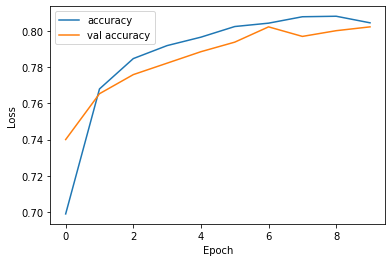

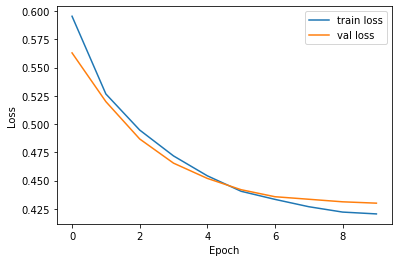

In [66]:
# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_seq_3.history['accuracy'],label='accuracy')
ax.plot(range(10),history_seq_3.history['val_accuracy'],label='val accuracy')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_seq_3.history['loss'],label='train loss')
ax.plot(range(10),history_seq_3.history['val_loss'],label='val loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [67]:
# Baseline Sequential evaluation using clasification report

y_pred_seq_bs = model_seq_bs.predict(X_test)
y_pred_seq_bs = np.where(y_pred_seq_2 >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq))

# Tuned Sequential Model evaluation using clasification report

y_pred_seq_3 = model_seq_3.predict(X_test)
y_pred_seq_3 = np.where(y_pred_seq_3 >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq_3))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       517
           1       0.61      0.49      0.54       187

    accuracy                           0.78       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.77      0.78      0.77       704

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       517
           1       0.61      0.53      0.57       187

    accuracy                           0.79       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.78      0.79      0.78       704



**Saya menambahkan batch normalization pada setiap layer untuk mengurangi vanishing dan exploding gradient.**

Visualisasi accuracy antara train_dataset dan val_dataset sama-sama mengalami peningkatan, garis terlihat lebih halus, dan gap kecil.

Visualisasi error antara train_dataset dan val_dataset sama-sama mengalami penurunan, garis terlihat lebih halus, dan gap kecil.

Evaluation report akan kita lihat di akhir Tunning.

### d. Dropout


In [68]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid, weight initialization GlorotNormal, with BatchNormalization

model_seq_4 = Sequential()

model_seq_4.add(Dense(4, input_shape=(45,), kernel_initializer=tf.keras.initializers.GlorotNormal(seed=12))) # Hidden layer 1
model_seq_4.add(tf.keras.layers.BatchNormalization())
model_seq_4.add(tf.keras.layers.Dropout(rate=0.1))
model_seq_4.add(tf.keras.layers.Activation('relu'))

model_seq_4.add(Dense(2)) # Hidden layer 2
model_seq_4.add(tf.keras.layers.BatchNormalization())
model_seq_4.add(tf.keras.layers.Dropout(rate=0.1))

model_seq_4.add(Dense(1)) # Output layer
model_seq_4.add(tf.keras.layers.BatchNormalization())
model_seq_4.add(tf.keras.layers.Dropout(rate=0.1))
model_seq_4.add(tf.keras.layers.Activation('sigmoid'))

model_seq_4.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

model_seq_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 4)                 184       
                                                                 
 batch_normalization_3 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 activation_2 (Activation)   (None, 4)                 0         
                                                                 
 dense_27 (Dense)            (None, 2)                 10        
                                                                 
 batch_normalization_4 (Batc  (None, 2)                8         
 hNormalization)                                      

In [69]:
# Train Sequential Model
history_seq_4 = model_seq_4.fit(train_dataset, validation_data=(val_dataset), epochs=10, verbose=1)

Epoch 1/10
170/170 [==============================] - 4s 6ms/step - loss: 0.6465 - accuracy: 0.6274 - val_loss: 0.5977 - val_accuracy: 0.6937
Epoch 2/10
170/170 [==============================] - 1s 4ms/step - loss: 0.5576 - accuracy: 0.7523 - val_loss: 0.5437 - val_accuracy: 0.7579
Epoch 3/10
170/170 [==============================] - 1s 4ms/step - loss: 0.5232 - accuracy: 0.7734 - val_loss: 0.4961 - val_accuracy: 0.7811
Epoch 4/10
170/170 [==============================] - 1s 4ms/step - loss: 0.5044 - accuracy: 0.7783 - val_loss: 0.4717 - val_accuracy: 0.7821
Epoch 5/10
170/170 [==============================] - 1s 4ms/step - loss: 0.4911 - accuracy: 0.7846 - val_loss: 0.4576 - val_accuracy: 0.7968
Epoch 6/10
170/170 [==============================] - 1s 4ms/step - loss: 0.4790 - accuracy: 0.7852 - val_loss: 0.4494 - val_accuracy: 0.8021
Epoch 7/10
170/170 [==============================] - 1s 4ms/step - loss: 0.4693 - accuracy: 0.7882 - val_loss: 0.4428 - val_accuracy: 0.8021
Epoch 

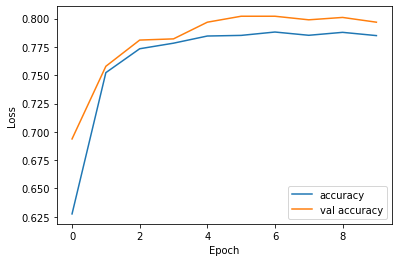

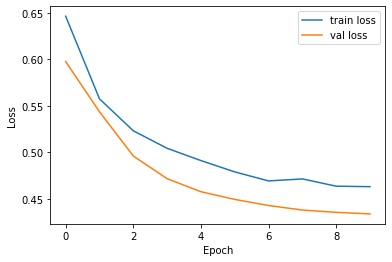

In [70]:
# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_seq_4.history['accuracy'],label='accuracy')
ax.plot(range(10),history_seq_4.history['val_accuracy'],label='val accuracy')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_seq_4.history['loss'],label='train loss')
ax.plot(range(10),history_seq_4.history['val_loss'],label='val loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [71]:
# Baseline Sequential evaluation using clasification report

y_pred_seq_bs = model_seq_bs.predict(X_test)
y_pred_seq_bs = np.where(y_pred_seq_bs >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq))

# Tuned Sequential Model evaluation using clasification report

y_pred_seq_4 = model_seq_4.predict(X_test)
y_pred_seq_4 = np.where(y_pred_seq_4 >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq_4))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       517
           1       0.61      0.49      0.54       187

    accuracy                           0.78       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.77      0.78      0.77       704

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       517
           1       0.63      0.45      0.53       187

    accuracy                           0.79       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.77      0.79      0.77       704



**Saya menambahkan dropout pada setiap layer** untuk menjadikan model lebih robust dan mencegah overfitting dan underfitting serta menambah accuracy **namun berdasarkan visualisasi jarak antara accuracy train dataset dan val dataset serta loss antara train dataset dan val dataset melebar**. Sehingga saya tidak akan menambahkan teknik dropout pada model. 

Evaluation report akan kita lihat di akhir Tunning.

### e. Optimizer

In [72]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid, weight initialization GlorotNormal, with BatchNormalization, optimizer adam

model_seq_5 = Sequential()

model_seq_5.add(Dense(4, input_shape=(45,), kernel_initializer=tf.keras.initializers.GlorotNormal(seed=12))) # Hidden layer 1
model_seq_5.add(tf.keras.layers.BatchNormalization())
model_seq_5.add(tf.keras.layers.Activation('relu'))

model_seq_5.add(Dense(2)) # Hidden layer 2
model_seq_5.add(tf.keras.layers.BatchNormalization())

model_seq_5.add(Dense(1)) # Output layer
model_seq_5.add(tf.keras.layers.BatchNormalization())
model_seq_5.add(tf.keras.layers.Activation('sigmoid'))

model_seq_5.compile(loss='binary_crossentropy',
                    optimizer='adam',
                  metrics=['accuracy'])

model_seq_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 4)                 184       
                                                                 
 batch_normalization_6 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 4)                 0         
                                                                 
 dense_30 (Dense)            (None, 2)                 10        
                                                                 
 batch_normalization_7 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_31 (Dense)            (None, 1)               

In [73]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid, weight initialization GlorotNormal, with BatchNormalization, optimizer nadam

model_seq_5 = Sequential()

model_seq_5.add(Dense(4, input_shape=(45,), kernel_initializer=tf.keras.initializers.GlorotNormal(seed=12))) # Hidden layer 1
model_seq_5.add(tf.keras.layers.BatchNormalization())
model_seq_5.add(tf.keras.layers.Activation('relu'))

model_seq_5.add(Dense(2)) # Hidden layer 2
model_seq_5.add(tf.keras.layers.BatchNormalization())

model_seq_5.add(Dense(1)) # Output layer
model_seq_5.add(tf.keras.layers.BatchNormalization())
model_seq_5.add(tf.keras.layers.Activation('sigmoid'))

model_seq_5.compile(loss='binary_crossentropy',
                    optimizer='nadam',
                  metrics=['accuracy'])

model_seq_5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 4)                 184       
                                                                 
 batch_normalization_9 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 4)                 0         
                                                                 
 dense_33 (Dense)            (None, 2)                 10        
                                                                 
 batch_normalization_10 (Bat  (None, 2)                8         
 chNormalization)                                                
                                                                 
 dense_34 (Dense)            (None, 1)               

In [74]:
# Train Sequential Model
history_seq_5 = model_seq_5.fit(train_dataset, validation_data=(val_dataset), epochs=10, verbose=1)

Epoch 1/10
170/170 [==============================] - 6s 6ms/step - loss: 0.6541 - accuracy: 0.6072 - val_loss: 0.6156 - val_accuracy: 0.7547
Epoch 2/10
170/170 [==============================] - 1s 4ms/step - loss: 0.5641 - accuracy: 0.6977 - val_loss: 0.5561 - val_accuracy: 0.7684
Epoch 3/10
170/170 [==============================] - 1s 4ms/step - loss: 0.5259 - accuracy: 0.7408 - val_loss: 0.5100 - val_accuracy: 0.7621
Epoch 4/10
170/170 [==============================] - 1s 4ms/step - loss: 0.5002 - accuracy: 0.7596 - val_loss: 0.4929 - val_accuracy: 0.7695
Epoch 5/10
170/170 [==============================] - 1s 4ms/step - loss: 0.4830 - accuracy: 0.7745 - val_loss: 0.4810 - val_accuracy: 0.7705
Epoch 6/10
170/170 [==============================] - 1s 4ms/step - loss: 0.4691 - accuracy: 0.7809 - val_loss: 0.4748 - val_accuracy: 0.7695
Epoch 7/10
170/170 [==============================] - 1s 4ms/step - loss: 0.4582 - accuracy: 0.7891 - val_loss: 0.4616 - val_accuracy: 0.7768
Epoch 

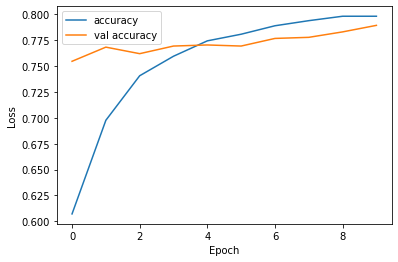

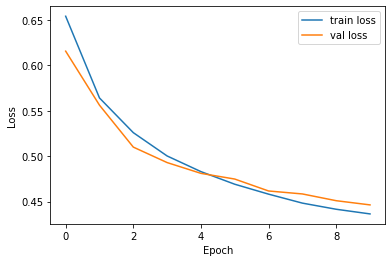

In [75]:
# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_seq_5.history['accuracy'],label='accuracy')
ax.plot(range(10),history_seq_5.history['val_accuracy'],label='val accuracy')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_seq_5.history['loss'],label='train loss')
ax.plot(range(10),history_seq_5.history['val_loss'],label='val loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [76]:
# Baseline Sequential evaluation using clasification report

y_pred_seq_bs = model_seq_bs.predict(X_test)
y_pred_seq_bs = np.where(y_pred_seq_bs >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq))

# Tuned Sequential Model evaluation using clasification report

y_pred_seq_5 = model_seq_5.predict(X_test)
y_pred_seq_5 = np.where(y_pred_seq_5 >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_seq_5))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       517
           1       0.61      0.49      0.54       187

    accuracy                           0.78       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.77      0.78      0.77       704

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       517
           1       0.60      0.56      0.58       187

    accuracy                           0.78       704
   macro avg       0.72      0.71      0.72       704
weighted avg       0.78      0.78      0.78       704



**Saya menambahkan optimizer nadam untuk menambah kecepatan training model.**

Visualisasi accuracy antara train_dataset dan val_dataset sama-sama mengalami peningkatan, garis terlihat lebih halus, dan gap kecil.

Visualisasi error antara train_dataset dan val_dataset sama-sama mengalami penurunan, garis terlihat lebih halus, dan gap kecil.

**Evaluation report untuk kelas 0 mengalami penurunan 0.02 pada recall dan penurunan 0.01 pada f1-score dan untuk kelas 1 mengalami penurunan 0.01 pada precision, peningkatan 0.03 pada recall, dan peningkatan 0.03 pada f1-score. Karena saya memperhatikan precision kelas 0 maka saya akan menggunakan model hasil tunning yang precissionnya sama.**

### f. Learning Rate: Tidak digunakan

### g. Regularisasi: Tidak digunakan

### h. Gradient Clipping: Tidak digunakan

## 6.3 - Final Seq Model (after Tuning)

In [77]:
model_seq_final = model_seq_5
history_seq_final = model_seq_5
y_pred_seq_final = y_pred_seq_5

# 7 - Functional API

## 7.1 - Baseline Model

In [122]:
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

In [78]:
# Create Sequential_Model_Baseline

input_layer = Input(shape=(45,)) # input layer
hidden_layer = Dense(4)(input_layer) # hidden layer 1
concat_layer = concatenate([input_layer, hidden2_layer])
output_layer = Dense(1, activation='sigmoid')(hidden_layer)


output_layer = Dense(1, activation='sigmoid')(concat_layer)


model_func_bs = Model(inputs=input_layer, outputs=output_layer)

model_func_bs.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

model_func_bs.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_35 (Dense)            (None, 4)                 184       
                                                                 
 dense_36 (Dense)            (None, 1)                 5         
                                                                 
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


**Baseline Functional Model merupakan Multilayer Perceptron untuk binary classification yaitu model yang memiliki minimal 1 hidden layer dan menghasilkan 1 output.**

**Model terdiri dari 3 layer yaitu:**
1. Layer input: menerima 45 neuron input sesuai dengan jumlah feature yang diinput setelah scaling, encoding, dan tensor_pipeline.
2. Hidden layer: terdiri dari 4 neuron sebagai tebakan awal.
3. Output layer: menghasilkan 1 neuron digunakan untuk dataset binary classification.

**Parameter pada compile adalah:**
1. Loss function: binary_crossentropy. Model menggunakan loss function binary_cronssentropy karena dataset binary classification
2. Metric: accuracy. Model menggunakan metric accuracy.

In [79]:
# Train Functional Model
history_func_bs = model_func_bs.fit(train_dataset, validation_data=(val_dataset), epochs=10, verbose=1)

Epoch 1/10
170/170 [==============================] - 2s 4ms/step - loss: 0.4422 - accuracy: 0.7833 - val_loss: 0.4330 - val_accuracy: 0.7926
Epoch 2/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4199 - accuracy: 0.8009 - val_loss: 0.4258 - val_accuracy: 0.7968
Epoch 3/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4158 - accuracy: 0.8007 - val_loss: 0.4254 - val_accuracy: 0.8011
Epoch 4/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4145 - accuracy: 0.8046 - val_loss: 0.4243 - val_accuracy: 0.7979
Epoch 5/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4142 - accuracy: 0.8046 - val_loss: 0.4255 - val_accuracy: 0.7989
Epoch 6/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.8047 - val_loss: 0.4258 - val_accuracy: 0.8021
Epoch 7/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4139 - accuracy: 0.8060 - val_loss: 0.4249 - val_accuracy: 0.7979
Epoch 

**Baseline Sequential Model di train menggunakan batch 64 (lihat tensor pipeline) dan epoch 10.**

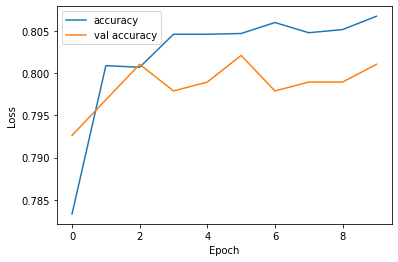

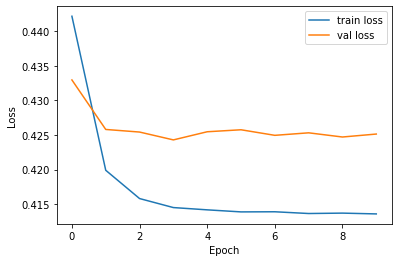

In [80]:
# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_func_bs.history['accuracy'],label='accuracy')
ax.plot(range(10),history_func_bs.history['val_accuracy'],label='val accuracy')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_func_bs.history['loss'],label='train loss')
ax.plot(range(10),history_func_bs.history['val_loss'],label='val loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [81]:
# Model evaluation using clasification report

y_pred_func_bs = model_func_bs.predict(X_test)
y_pred_func_bs = np.where(y_pred_func_bs >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_func_bs))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       517
           1       0.64      0.48      0.55       187

    accuracy                           0.79       704
   macro avg       0.73      0.69      0.70       704
weighted avg       0.78      0.79      0.78       704



**Berdasarkan visualisasi terlihat accuracy dan loss dari train_dataset dan val_dataset sudah cukup baik.** Accuracy mengalami kenaikan dengan gap yang kecil antar train_dataset dan val_dataset. Accuracy val_dataset menyentuh angka 0.7979 di akhir epoch. Loss mengalami penurunan dengan gap yang kecil antar train_dataset dan val_dataset. Loss val_dataset menyentuh angka 0.4265 di akhir epoch.

**Churn merupakan suatu kejadian dimana seorang customer memutus hubungan dengan perusahaan kita.** Tujuan kita adalah untuk meminimalisir churn rate sehingga kita akan berfokus pada label 0 yaitu orang yang tidak churn. Dengan berfokus ke label 0 kita bisa lebih menargetkan promo atau fitur atau service baru kepada customer yang tersebut agar bertahan sambil mencari customer baru.

**Berdasarkan classification record, model memiliki precision 0.83 dan recall sebesar 0.90 yang tergolong tinggi.**

- Precision : Jadi dari 517 customer yang tidak churn, kita berhasil mengklasifikasikan 83% customer benar tidak churn dan dan salah mengklasifikasikan 17% sisanya sebagai customer yang churn padahal seharusnya tidak churn.
- Recall : Jadi dari 517 customer yang tidak churn, kita berhasil mengklasifikasikan 90% customer benar tidak churn dan salah mengklasifikasikan 10% yang seharusnya dia churn tapi kita anggap sebagai tidak churn.

**Kita akan melakukan tunning untuk meningkatkan accuracy dan menurunkan loss.**


## 7.2 - Functional Model (after Tunning)

Model akan dituning dengan format tunning yang sama dengan Model Sequential.

### a. Define Neuron, Layer, and Activation Function

In [82]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid

input_layer = Input(shape=(45,)) # input layer
hidden1_layer = Dense(4, activation='relu')(input_layer) # hidden layer 1
hidden2_layer = Dense(2)(hidden1_layer) # hidden layer 1
output_layer = Dense(1, activation='sigmoid')(hidden2_layer)

model_func_1 = Model(inputs=input_layer, outputs=output_layer)

model_func_1.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

model_func_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_37 (Dense)            (None, 4)                 184       
                                                                 
 dense_38 (Dense)            (None, 2)                 10        
                                                                 
 dense_39 (Dense)            (None, 1)                 3         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Train Sequential Model
history_func_1 = model_func_1.fit(train_dataset, validation_data=(val_dataset), epochs=10, verbose=1)

Epoch 1/10
170/170 [==============================] - 2s 4ms/step - loss: 0.5059 - accuracy: 0.7645 - val_loss: 0.4533 - val_accuracy: 0.7726
Epoch 2/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.7930 - val_loss: 0.4389 - val_accuracy: 0.7884
Epoch 3/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.7988 - val_loss: 0.4342 - val_accuracy: 0.7905
Epoch 4/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4178 - accuracy: 0.8024 - val_loss: 0.4305 - val_accuracy: 0.7958
Epoch 5/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8046 - val_loss: 0.4287 - val_accuracy: 0.7958
Epoch 6/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4153 - accuracy: 0.8036 - val_loss: 0.4273 - val_accuracy: 0.7958
Epoch 7/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4142 - accuracy: 0.8052 - val_loss: 0.4281 - val_accuracy: 0.7989
Epoch 

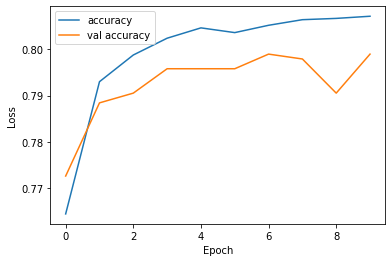

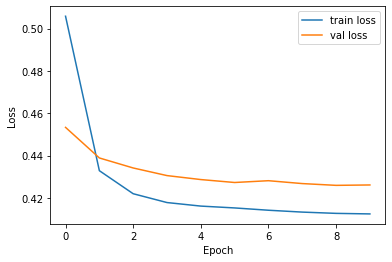

In [84]:
# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_func_1.history['accuracy'],label='accuracy')
ax.plot(range(10),history_func_1.history['val_accuracy'],label='val accuracy')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_func_1.history['loss'],label='train loss')
ax.plot(range(10),history_func_1.history['val_loss'],label='val loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()


In [85]:
# Baseline Functional evaluation using clasification report

y_pred_func_bs = model_func_bs.predict(X_test)
y_pred_func_bs = np.where(y_pred_func_bs >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_func_bs))

# Tuned Functional Model evaluation using clasification report

y_pred_func_1 = model_func_1.predict(X_test)
y_pred_func_1 = np.where(y_pred_func_1 >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_func_1))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       517
           1       0.64      0.48      0.55       187

    accuracy                           0.79       704
   macro avg       0.73      0.69      0.70       704
weighted avg       0.78      0.79      0.78       704

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.91      0.86       517
           1       0.64      0.48      0.55       187

    accuracy                           0.79       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.78      0.79      0.78       704



**Setelah melakukan beberapa percobaan saya menggunakan 2 hidden layer dengan neuron (4,2), fungsi aktivasi relu pada hidden layer 1 dan fungsi aktivasi sigmoid pada layer output, loss function binary_crossentropy, metrik accuracy, dan epoch 10.**

Visualisasi accuracy antara train_dataset dan val_dataset sama-sama mengalami peningkatan, garis terlihat lebih halus, dan gap kecil.

Visualisasi error antara train_dataset dan val_dataset sama-sama mengalami penurunan, garis terlihat lebih halus, dan gap kecil.

Evaluation report akan kita lihat di akhir Tunning.

### b. Weight Initialization

In [86]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid, weight initialization GlorotNormal

input_layer = Input(shape=(45,)) # input layer
hidden1_layer = Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=12))(input_layer) # hidden layer 1
hidden2_layer = Dense(2)(hidden1_layer) # hidden layer 1
output_layer = Dense(1, activation='sigmoid')(hidden2_layer)

model_func_2 = Model(inputs=input_layer, outputs=output_layer)

model_func_2.compile(loss='binary_crossentropy',
                  metrics=['accuracy'])

model_func_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_40 (Dense)            (None, 4)                 184       
                                                                 
 dense_41 (Dense)            (None, 2)                 10        
                                                                 
 dense_42 (Dense)            (None, 1)                 3         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Train Sequential Model
history_func_2 = model_func_2.fit(train_dataset, validation_data=(val_dataset), epochs=10, verbose=1)

Epoch 1/10
170/170 [==============================] - 2s 4ms/step - loss: 0.5821 - accuracy: 0.6818 - val_loss: 0.4680 - val_accuracy: 0.7684
Epoch 2/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4429 - accuracy: 0.7809 - val_loss: 0.4301 - val_accuracy: 0.7968
Epoch 3/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.7962 - val_loss: 0.4242 - val_accuracy: 0.7968
Epoch 4/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4170 - accuracy: 0.8021 - val_loss: 0.4223 - val_accuracy: 0.7979
Epoch 5/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4136 - accuracy: 0.8074 - val_loss: 0.4216 - val_accuracy: 0.8032
Epoch 6/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8079 - val_loss: 0.4218 - val_accuracy: 0.8000
Epoch 7/10
170/170 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8078 - val_loss: 0.4223 - val_accuracy: 0.7989
Epoch 

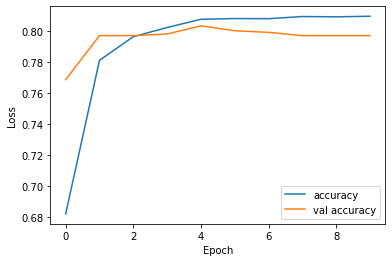

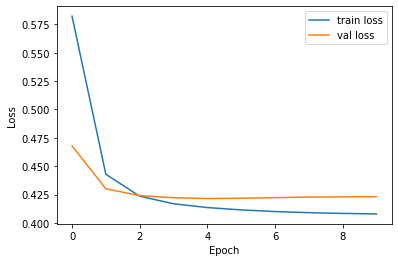

In [88]:
# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_func_2.history['accuracy'],label='accuracy')
ax.plot(range(10),history_func_2.history['val_accuracy'],label='val accuracy')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_func_2.history['loss'],label='train loss')
ax.plot(range(10),history_func_2.history['val_loss'],label='val loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [89]:
# Baseline Functional evaluation using clasification report

y_pred_func_bs = model_func_bs.predict(X_test)
y_pred_func_bs = np.where(y_pred_func_bs >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_func_bs))

# Tuned Functional Model evaluation using clasification report

y_pred_func_2 = model_func_2.predict(X_test)
y_pred_func_2 = np.where(y_pred_func_2 >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_func_2))

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       517
           1       0.64      0.48      0.55       187

    accuracy                           0.79       704
   macro avg       0.73      0.69      0.70       704
weighted avg       0.78      0.79      0.78       704

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       517
           1       0.61      0.53      0.57       187

    accuracy                           0.78       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.78      0.78      0.78       704



**Setelah melakukan beberapa percobaan saya menambahkan weight initialization GlorotNormal.**

Visualisasi accuracy antara train_dataset dan val_dataset sama-sama mengalami peningkatan, garis terlihat lebih halus, dan gap kecil.

Visualisasi error antara train_dataset dan val_dataset sama-sama mengalami penurunan, garis terlihat lebih halus, dan gap kecil.

Evaluation report akan kita lihat di akhir Tunning.

### c. BatchNormalization

In [90]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid, weight initialization GlorotNormal

# input_layer = Input(shape=(45,)) # input layer
# hidden1_layer = Dense(4, activation='relu')(input_layer) # hidden layer 1
# hidden2_layer = Dense(2)(hidden1_layer) # hidden layer 1
# output_layer = Dense(1, activation='sigmoid')(hidden2_layer)

# model_func_1 = Model(inputs=input_layer, outputs=output_layer)

# model_func_1.compile(loss='binary_crossentropy',
#                   metrics=['accuracy'])

# model_func_1.summary()

In [91]:
# Train Sequential Model
# history_seq_3 = model_seq_3.fit(train_dataset, validation_data=(val_dataset), epochs=10, verbose=1)

In [92]:
# # plot loss
# fig, ax = plt.subplots()
# ax.plot(range(10),history_seq_3.history['accuracy'],label='accuracy')
# ax.plot(range(10),history_seq_3.history['val_accuracy'],label='val accuracy')

# ax.set_xlabel('Epoch')
# ax.set_ylabel('Loss')
# plt.legend()

# # plot loss
# fig, ax = plt.subplots()
# ax.plot(range(10),history_seq_3.history['loss'],label='train loss')
# ax.plot(range(10),history_seq_3.history['val_loss'],label='val loss')

# ax.set_xlabel('Epoch')
# ax.set_ylabel('Loss')
# plt.legend()

In [93]:
# # Baseline Sequential evaluation using clasification report

# y_pred_seq_bs = model_seq_bs.predict(X_test)
# y_pred_seq_bs = np.where(y_pred_seq_bs >= 0.5, 1, 0)

# print(classification_report(y_test_final, y_pred_seq))

# # Tuned Sequential Model evaluation using clasification report

# y_pred_seq_2 = model_seq_2.predict(X_test)
# y_pred_seq_2 = np.where(y_pred_seq_2 >= 0.5, 1, 0)

# print(classification_report(y_test_final, y_pred_seq_2))

### d. Dropout

In [94]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid, weight initialization GlorotNormal, with BatchNormalization

# model_seq_4 = Sequential()

# model_seq_4.add(Dense(4, input_shape=(45,), kernel_initializer=tf.keras.initializers.GlorotNormal(seed=12))) # Hidden layer 1
# model_seq_4.add(tf.keras.layers.BatchNormalization())
# model_seq_4.add(tf.keras.layers.Dropout(rate=0.1))
# model_seq_4.add(tf.keras.layers.Activation('relu'))

# model_seq_4.add(Dense(2)) # Hidden layer 2
# model_seq_4.add(tf.keras.layers.BatchNormalization())
# model_seq_4.add(tf.keras.layers.Dropout(rate=0.1))

# model_seq_4.add(Dense(1)) # Output layer
# model_seq_4.add(tf.keras.layers.BatchNormalization())
# model_seq_4.add(tf.keras.layers.Dropout(rate=0.1))
# model_seq_4.add(tf.keras.layers.Activation('sigmoid'))

# model_seq_4.compile(loss='binary_crossentropy',
#                   metrics=['accuracy'])

# model_seq_4.summary()

In [95]:
# Train Sequential Model
# history_seq_4 = model_seq_4.fit(train_dataset, validation_data=(val_dataset), epochs=10, verbose=1)

In [96]:
# plot loss
# fig, ax = plt.subplots()
# ax.plot(range(10),history_seq_4.history['accuracy'],label='accuracy')
# ax.plot(range(10),history_seq_4.history['val_accuracy'],label='val accuracy')

# ax.set_xlabel('Epoch')
# ax.set_ylabel('Loss')
# plt.legend()

# plot loss
# fig, ax = plt.subplots()
# ax.plot(range(10),history_seq_4.history['loss'],label='train loss')
# ax.plot(range(10),history_seq_4.history['val_loss'],label='val loss')

# ax.set_xlabel('Epoch')
# ax.set_ylabel('Loss')
# plt.legend()

In [97]:
# Baseline Sequential evaluation using clasification report

# y_pred_seq_bs = model_seq_bs.predict(X_test)
# y_pred_seq_bs = np.where(y_pred_seq_bs >= 0.5, 1, 0)

# print(classification_report(y_test_final, y_pred_seq))

# Tuned Sequential Model evaluation using clasification report

# y_pred_seq_4 = model_seq_4.predict(X_test)
# y_pred_seq_4 = np.where(y_pred_seq_4 >= 0.5, 1, 0)

# print(classification_report(y_test_final, y_pred_seq_4))

### e. Optimizer

In [123]:
# 2 hidden layer 4,2, fungsi aktivasi layer 1 relu, layer output sigmoid, weight initialization GlorotNormal, with BatchNormalization, optimizer nadam

input_layer = Input(shape=(45,)) # input layer
hidden1_layer = Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.GlorotNormal(seed=12))(input_layer) # hidden layer 1
hidden2_layer = Dense(2)(hidden1_layer) # hidden layer 1
output_layer = Dense(1, activation='sigmoid')(hidden2_layer)

model_func_3 = Model(inputs=input_layer, outputs=output_layer)

model_func_3.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_func_3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_46 (Dense)            (None, 4)                 184       
                                                                 
 dense_47 (Dense)            (None, 2)                 10        
                                                                 
 dense_48 (Dense)            (None, 1)                 3         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [124]:
# Train Sequential Model
history_func_3 = model_func_3.fit(train_dataset, validation_data=(val_dataset), epochs=10, verbose=1)

Epoch 1/10
170/170 [==============================] - 3s 5ms/step - loss: 0.5143 - accuracy: 0.7369 - val_loss: 0.4519 - val_accuracy: 0.7916
Epoch 2/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4360 - accuracy: 0.7977 - val_loss: 0.4322 - val_accuracy: 0.8000
Epoch 3/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.8062 - val_loss: 0.4275 - val_accuracy: 0.7958
Epoch 4/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4180 - accuracy: 0.8067 - val_loss: 0.4257 - val_accuracy: 0.7979
Epoch 5/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4155 - accuracy: 0.8067 - val_loss: 0.4241 - val_accuracy: 0.7989
Epoch 6/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4139 - accuracy: 0.8067 - val_loss: 0.4231 - val_accuracy: 0.7979
Epoch 7/10
170/170 [==============================] - 1s 3ms/step - loss: 0.4128 - accuracy: 0.8076 - val_loss: 0.4223 - val_accuracy: 0.8000
Epoch 

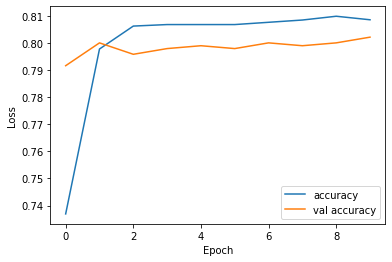

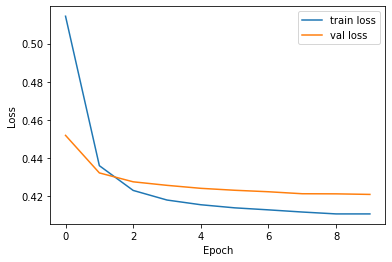

In [125]:
# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_func_3.history['accuracy'],label='accuracy')
ax.plot(range(10),history_func_3.history['val_accuracy'],label='val accuracy')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

# plot loss
fig, ax = plt.subplots()
ax.plot(range(10),history_func_3.history['loss'],label='train loss')
ax.plot(range(10),history_func_3.history['val_loss'],label='val loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()

In [126]:
# Baseline Functional evaluation using clasification report

y_pred_func_bs = model_func_bs.predict(X_test)
y_pred_func_bs = np.where(y_pred_func_bs >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_func_bs))

# Tuned Functional Model evaluation using clasification report

y_pred_func_3 = model_func_3.predict(X_test)
y_pred_func_3 = np.where(y_pred_func_3 >= 0.5, 1, 0)

print(classification_report(y_test_final, y_pred_func_3))

22/22 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       517
           1       0.64      0.48      0.55       187

    accuracy                           0.79       704
   macro avg       0.73      0.69      0.70       704
weighted avg       0.78      0.79      0.78       704

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       517
           1       0.61      0.52      0.56       187

    accuracy                           0.78       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.77      0.78      0.78       704



**Saya menambahkan optimizer adam untuk menambah kecepatan training model.**

Visualisasi accuracy antara train_dataset dan val_dataset sama-sama mengalami peningkatan, garis terlihat lebih halus, dan gap kecil.

Visualisasi error antara train_dataset dan val_dataset sama-sama mengalami penurunan, garis terlihat lebih halus, dan gap kecil.

**Evaluation report untuk kelas 0 mengalami penurunan 0.02 pada recall kelas 0, dan penurunan 0.03 precision, peningkatan 0.04 pada recall, dan peningkatan 0.01 pada f1-score kelas-1. Model dapat dikatakan mengalami penurunan.**

## 7.3 - Final Seq Model (after Tuning)

In [127]:
model_func_final = model_func_3
history_func_final = model_func_3
y_pred_func_final = y_pred_func_3

# 8 - Model Analysis

In [128]:
# membandingkan hasil evaluasi akhir dari baseline sequential, tuned sequential, baseline functional, tuned functional

# evaluasi baseline sequential
print('---evaluasi baseline sequential---')
print(classification_report(y_test_final, y_pred_seq_bs))

# evaluasi tunned sequential
print('---evaluasi tunned sequential---')
print(classification_report(y_test_final, y_pred_seq_final))

# evaluasi baseline functional
print('---evaluasi baseline functional---')
print(classification_report(y_test_final, y_pred_func_bs))

# evaluasi tunned functional
print('---evaluasi tunned functional---')
print(classification_report(y_test_final, y_pred_func_final))


---evaluasi baseline sequential---
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       517
           1       0.61      0.49      0.54       187

    accuracy                           0.78       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.77      0.78      0.77       704

---evaluasi tunned sequential---
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       517
           1       0.60      0.56      0.58       187

    accuracy                           0.78       704
   macro avg       0.72      0.71      0.72       704
weighted avg       0.78      0.78      0.78       704

---evaluasi baseline functional---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       517
           1       0.64      0.48      0.55       187

    accuracy                           0.79       704
   macro avg       0.73  

**Dalam kasus ini kita awalnya menggunakan 2 baseline model untuk melakukan klasifikasi churn. Model yang digunakan ada dua jenis yaitu sequential dan functional.** Kedua model mampu belajar dengan baik, hal itu dibuktikan dari grafik loss dan accuracy dimana kedua model menghasilkan loss yang rendah, accuracy yang tinggi, dan juga tidak overfit.

Kedua model tersebut dicoba untuk diimprove dengan menambah jumlah hidden layer,neuron, activation function, weight initialization, batchnormalization, dan optimizer.

**Churn merupakan suatu kejadian dimana seorang customer memutus hubungan dengan perusahaan kita. Tujuan kita adalah untuk meminimalisir churn rate sehingga kita akan berfokus pada label 0 yaitu orang yang tidak churn.** Dengan berfokus ke label 0 kita bisa lebih menargetkan promo atau fitur atau service baru kepada customer yang tersebut agar bertahan sambil mencari customer baru.

**Berdasarkan hal tersebut dan hasil evaluation report, model terbaik adalah model hasil tunned functional dengan precision 0.85, recall 0.89, dan f1-score 0.87 untuk kelas 0.**

# 9 - Model Inference

Sebelum melakukan evaluasi pada Inference Set, kita akan melakukan tahapan preprocessing yang sama dengan yang dilakukan pada Test-Set. Kita akan memilih untuk menggunakan functional model hasil improvement untuk melakukan klasifikasi pada inference set.

In [ ]:
# Memilih fitur yang akan digunakan
data_inf_.drop(columns=['customerID'], axis=1, inplace=True)

In [105]:
# Menggunakan preproccess pipeline pada data inf

data_inf_final = preprocess.transform(data_inf)

In [106]:
# Melakukan encode pada target data inf
data_inf_target = label_enc.transform(data_inf['Churn'])

In [107]:
# melakukan predict pada inference set
y_pred_inf = model_func_final.predict(data_inf_final)
y_pred_inf = np.where(y_pred_inf >= 0.5, 'Yes', 'No')

1/1 [==============================] - 0s 97ms/step


In [108]:
# Membuat hasil prediksi menjadi dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Functional Prediction'])

In [109]:
pred_inf = pd.concat([data_inf['Churn'], y_pred_inf_df], axis=1)
pred_inf

,Churn,Functional Prediction
0,Yes,No
1,No,No
2,No,No
3,Yes,Yes
4,No,No
5,No,No
6,No,No
7,Yes,No
8,No,No
9,No,No


In [110]:
print('----Inference Set----')
print(classification_report(data_inf['Churn'], y_pred_inf_df))

----Inference Set----
              precision    recall  f1-score   support

          No       0.78      1.00      0.88         7
         Yes       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10



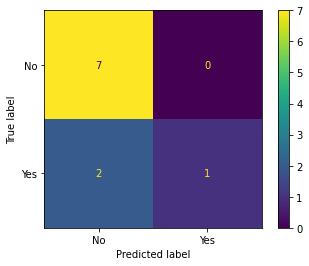

In [111]:
ConfusionMatrixDisplay.from_predictions(data_inf['Churn'], y_pred_inf_df)
plt.show()

Hasil klasifikasi model inference cukup baik dengan accuracy 0.80 pada classification report. Dari 7 orang yang aslinya tidak churn kita berhasil mengklasifikasikan 7 tidak churn. Dari 3 orang yang aslinya churn, kita berhasil mengklasifikasikan 1 orang churn dan 2 orang salah klasifikasi menjadi tidak churn padahal aslinya churn.

# 10 - Pengambilan Kesimpulan

Dataset kali ini berisi data customer Telco, dimana Telco adalah salah satu perusahaan telekomunikasi yang menyediakan beberapa layanan seperti layanan telfon, internet, streaming tv, dan lain-lain. Jumlah perbandingan churn dan tidak churn imbalance karena yang tidak churn memiliki persentase sebesar 73.5% dan yang churn hanya 26.5%. Customer telco memiliki jumlah gender yang hampir setara antara pria dan wanita. Customer kita juga beragam dari orang dewasa hingga orang lanjut usia. Lamanya customer kita sudah berlangganan juga beragam dari 1 bulan hingga 72 bulan dengan rata-rata sudah berlangganan 32 bulan. Kita juga tahu ternyata sudah banyak customer kita yang berlangganan telfon sebanyak 90.3% dimana ada yang menggunakan multiple lines ada juga yang tidak. Kita juga lihat ada 78.4% orang yang sudah berlangganan internet dengan jenis fiber optic dan juga DSL. Dan untuk orang yang berlangganan internet, telco menawarkan banyak fasilitas seperti online security, online backup, device protection, tech support, streaming tv, dan streaming movies. Fitur payments yang ditawarkan oleh telco juga beragam, kita bisa memilih beragam waktu kontrak dari perbulan, 1 tahun, dan 2 tahun. Kita juga bisa memilih untuk menerima tagihan berbentuk kertas atau online, dan juga kita bisa memilih metode pembayaran seperti bank transfer, credit card, cek, dan online cek.

Dalam kasus ini kita berfokus pada target churn. Churn merupakan suatu kejadian dimana seorang customer memutus hubungan dengan perusahaan kita, maka dari itu tujuan kita adalah untuk meminimalisir churn rate. Menurut saya kita harus lebih berfokus pada label 0 dimana kita harus bisa menjaga agar customer tersebut tidak akan memutuskan hubungan dengan perusahaan sambil bisa mencari customer baru. Dengan fokus ke label 0 kita bisa lebih menargetkan promo atau fitur atau service baru kepada customer yang bertahan supaya mereka tetap bertahan dan tidak churn.

Model yang buat untuk melakukan klasifikasi churn customer kali ini ada dua yaitu sequential model dan juga functional model. Kedua model dibentuk dengan arsitektur yang sama yaitu menggunakan 1 hidden layer dengan jumlah neuron 4 dan 1 output layer dengan 1 neuron. Kedua model menghasilkan performa yang cukup baik dilihat dari grafik loss dan accuracy saat training yang cukup baik dan juga tidak overfit.

Model sequential dan functional yang sudah dibuat tadi dicoba untuk diimprove dengan mengganti hyperparameternya. Pada model sequential dilakukan improvement dengan menambahkan jumlah hidden layer menjadi 2, jumlah neuron pada hidden layernya [4, 2], penggunaan initializer GlorotNormal, batch normalization, dan optimizer nadam. Parameter 189 pada model baseline berubah menjadi 197 parameter. Pada model sequential dilakukan improvement dengan menambahkan jumlah hidden layer menjadi 2, jumlah neuron pada hidden layernya [4, 2], dan penggantian optimizer ke nadam. Parameter 189 pada model baseline berubah menjadi 197 parameter.

Model hasil improvement malah mengalami penurunan dan peningkatan pada beberapa area prediksi. Berdasarkan classification report, saya memilih menggunakan model hasil tunned functional dengan precision 0.85, recall 0.89, dan f1-score 0.87 untuk kelas 0.

**Saran** :

Data Scientist dapat mencoba menyeimbangkan target, mengubah learning rate, melakukan regularisasi, maupun gradient clipping.

# 11 - Model Saving

In [129]:
# Save Pipeline

with open('preprocess.pkl', 'wb') as file_1:
  joblib.dump(preprocess, file_1)

In [130]:
# Save label_enc

with open('label_enc.pkl', 'wb') as file_2:
  joblib.dump(label_enc, file_2)

In [131]:
# Summary of Model Sequential

model_func_final.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_46 (Dense)            (None, 4)                 184       
                                                                 
 dense_47 (Dense)            (None, 2)                 10        
                                                                 
 dense_48 (Dense)            (None, 1)                 3         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [132]:
# freeze model
model_func_final.trainable = False
model_func_final.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_46 (Dense)            (None, 4)                 184       
                                                                 
 dense_47 (Dense)            (None, 2)                 10        
                                                                 
 dense_48 (Dense)            (None, 1)                 3         
                                                                 
Total params: 197
Trainable params: 0
Non-trainable params: 197
_________________________________________________________________


In [134]:
# Save DNN Model

model_func_final.save('TC_model.h5')

# 12 - Model Deployment 

Hugging Face: https://huggingface.co/spaces/Wenny/Telco-Customer-Churn

# 13 - Presentation

Google Slide: https://docs.google.com/presentation/d/1hdQ281H_vs2bU_kxJXYbWlE30THBCo_5giQc_RgpOkU/edit#slide=id.p

Referensi: https://www.youtube.com/results?search_query=how+to+make+interactive+presentation